In [19]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd

In [ ]:
import os
os.chdir("drive/My Drive/Data") 

In [ ]:
!pwd

In [25]:
train = pd.read_csv('Train.csv')
train.head()

,Unnamed: 0,ID,Datetime,Count
0,0,0,25-08-2012 00:00,8.0
1,1,1,25-08-2012 01:00,2.0
2,2,2,25-08-2012 02:00,6.0
3,3,3,25-08-2012 03:00,2.0
4,4,4,25-08-2012 04:00,2.0


In [26]:
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.head()

train.index = train.Datetime
train.head()

train.drop(['ID','Datetime'], axis=1, inplace=True)
train.head()

train.drop(['Unnamed: 0'], axis=1, inplace=True)
train.head()

# resample
daily_train = train.resample('D').sum()
daily_train.head()

daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'], axis=1, inplace=True)
daily_train.head()




,ds,y
Datetime,,
2012-08-25,2012-08-25,76.0
2012-08-26,2012-08-26,88.0
2012-08-27,2012-08-27,62.0
2012-08-28,2012-08-28,58.0
2012-08-29,2012-08-29,60.0


In [27]:
from fbprophet import Prophet

In [28]:
m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)

In [29]:
m.fit(daily_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future = m.make_future_dataframe(periods=213)
future

,ds
0,2012-08-25
1,2012-08-26
2,2012-08-27
3,2012-08-28
4,2012-08-29
...,...
971,2015-04-23
972,2015-04-24
973,2015-04-25
974,2015-04-26


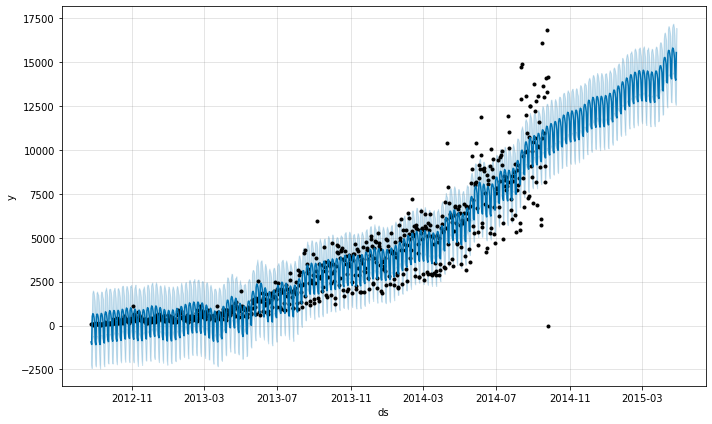

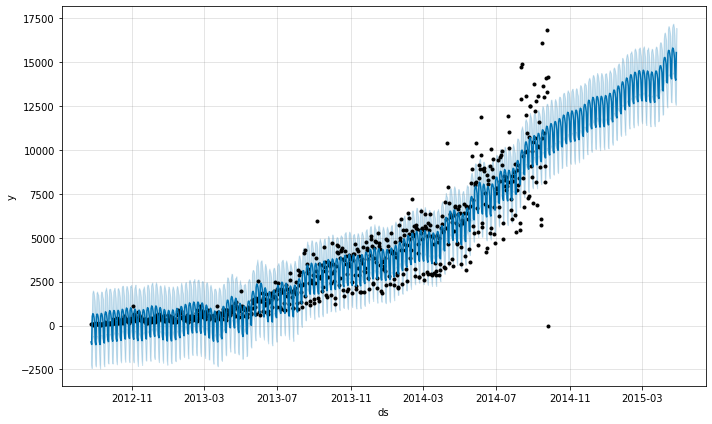

In [31]:
forecast = m.predict(future)
m.plot(forecast)

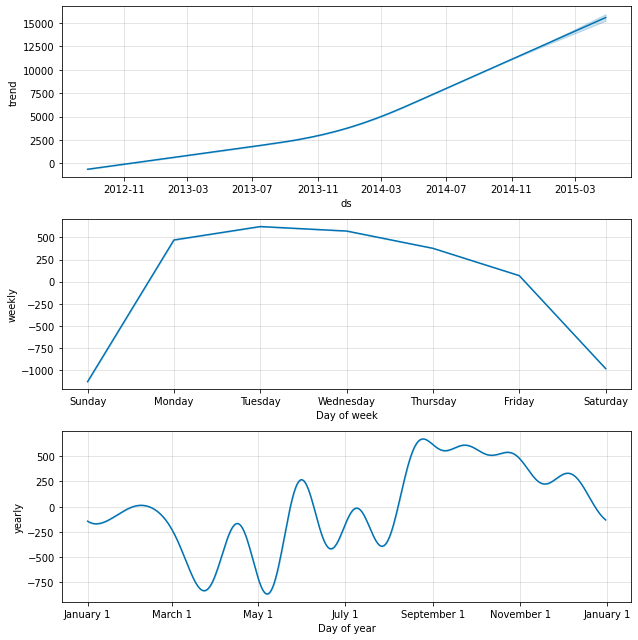

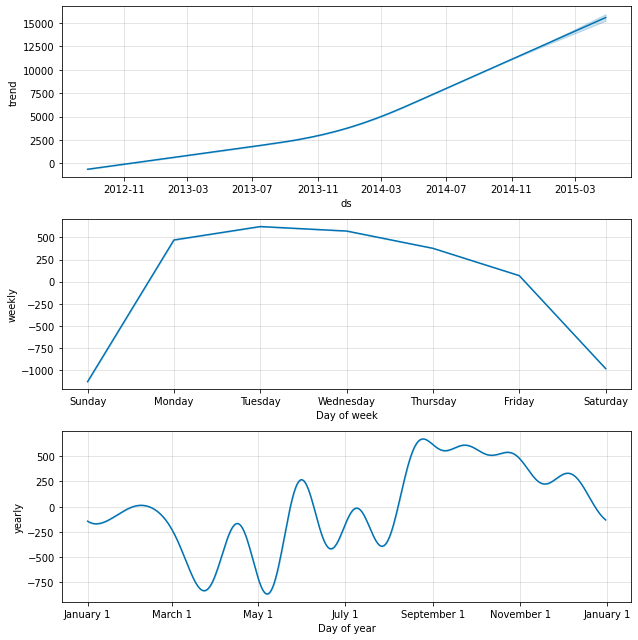

In [33]:
m.plot_components(forecast)